# Building a Monte Carlo Simulation Tool to Understand Poker Variance

##### Steve Gregoire - steveg93@gmail.com


As both a software developer and a committed poker player, I wanted to better understand the role of variance in my long-term poker results. After recording hundreds of hours of live play, I found that even with a positive win rate, the short-term fluctuations in bankroll could be psychologically taxing. I needed a tool that would help me visualize the range of possible outcomes over time—something that could help me contextualize the swings I was experiencing.

So, I wrote a Monte Carlo simulation program in Python to do just that.

---

## Purpose and Functionality

The goal of the program is to simulate long-term poker results using historical performance statistics. The user provides four inputs:

- **Hourly win rate** (in dollars per hour)  
- **Standard deviation** of hourly results  
- **Number of hours** to simulate  
- **Number of simulations** to run (defaults to 1,000)  

Using these parameters, the program runs multiple simulations of poker sessions, projecting potential bankroll trajectories over the specified time horizon. Each simulation is visualized as a line graph: the line goes up when you win and down when you lose. The result is a powerful, data-driven visualization of the variance poker players can expect—even when they have a solid edge.

---

## Visualization and Confidence Intervals

The visualization is built using the `matplotlib` library, which is included in standard Python installations. In addition to plotting individual simulation paths, the chart also includes a shaded **95% confidence interval**. This interval is calculated by taking the 2.5th and 97.5th percentiles of the simulation outcomes at each time point.

This helps players see where their results are most likely to fall and how extreme outliers—both good and bad—can occur due to randomness.

---

## Why Input Accuracy Matters

The quality of the simulation is only as good as the data you feed into it. To get meaningful projections, players must diligently record the results of every session they play—wins and losses alike. The more data you collect, the more accurately you can estimate your true win rate and standard deviation, and the more reliable your simulation becomes.

I recommend a Google Sheet to track your poker results. Capture these fields at a minimum

| Date | Stakes | Location | Buy in | Cash out | Hours | Win/Lose | Earn Per Hour |
|:---|:---|:---|-------:|---------:|------:|---------:|--------------:|
| 10/16/2022 | 1-3 | Encore | \$300 | \$300 | 5 | \$0 | \$0 |
| 11/11/2022 | 1-3 | Encore | \$600 | \$928 | 3 | \$328 | \$109 |
| 11/13/2022 | 1-3 | Encore | \$500 | \$951 | 3.75 | \$451 | \$120 |
| 11/15/2022 | 1-3 | Encore | \$700 | \$453 | 3 | -\$247 | -\$82 |




It’s also worth noting that for players who haven’t logged many hours, their statistics will likely evolve over time—especially if they are actively working to improve through study and review. The tool doesn't predict improvement; it models outcomes based on your current measured performance. 

---

## Final Thoughts

This project is a direct result of combining my passion for poker with my background in software development. It’s a practical tool that has helped me maintain perspective, manage expectations, and understand the financial trajectory of playing poker with a long-term mindset. I hope that, as I continue to refine it, it can serve other players in the same way.

If you're a serious poker player who tracks your sessions and wants a clearer picture of how variance affects your results over time, this tool can be a valuable resource.


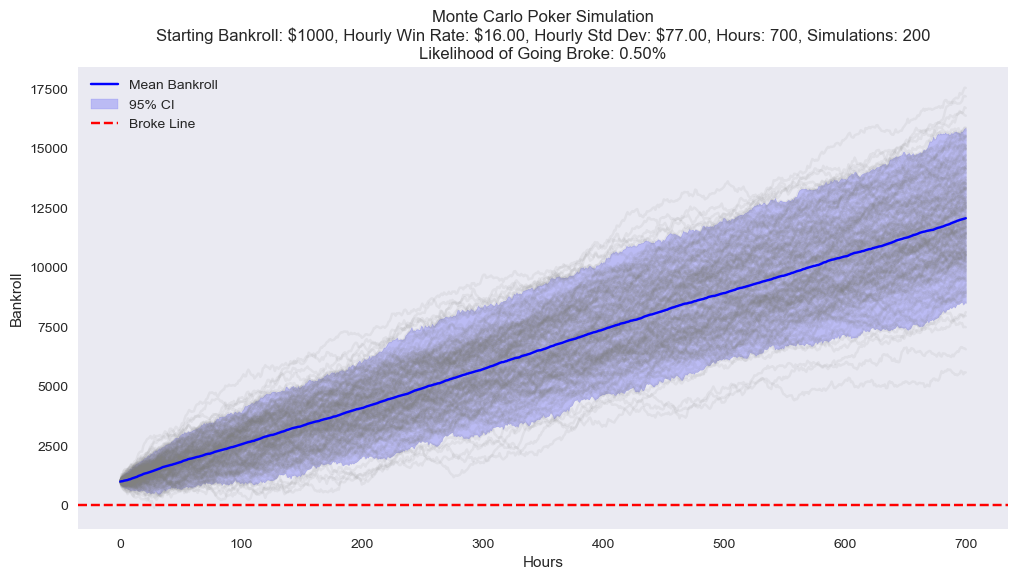

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_poker_simulation(starting_bankroll, hourly_win_rate, hourly_std_dev, num_simulations, num_hours):
    # Arrays to hold simulation results
    simulations = []
    broke_count = 0

    for _ in range(num_simulations):
        bankroll = starting_bankroll
        hourly_results = np.random.normal(hourly_win_rate, hourly_std_dev, num_hours)
        bankroll_history = [bankroll]
        
        for result in hourly_results:
            bankroll += result
            bankroll_history.append(bankroll)
            if bankroll <= 0:  # Check if the player goes broke
                broke_count += 1
                break
        simulations.append(bankroll_history)
    
    # Pad shorter simulations with NaN for plotting
    max_length = max(len(s) for s in simulations)
    padded_simulations = [np.pad(s, (0, max_length - len(s)), 'constant', constant_values=np.nan) for s in simulations]

    # Convert to NumPy array for calculations
    padded_simulations = np.array(padded_simulations)
    mean_bankroll = np.nanmean(padded_simulations, axis=0)
    lower_percentile = np.nanpercentile(padded_simulations, 2.5, axis=0)
    upper_percentile = np.nanpercentile(padded_simulations, 97.5, axis=0)

    # Calculate probability of going broke
    broke_probability = (broke_count / num_simulations) * 100

    # Plot results
    plt.figure(figsize=(12, 6))
    for sim in padded_simulations:
        plt.plot(sim, color='gray', alpha=0.1)  # Plot individual simulations
    plt.plot(mean_bankroll, color='blue', label='Mean Bankroll')
    plt.fill_between(range(max_length), lower_percentile, upper_percentile, color='blue', alpha=0.2, label='95% CI')
    plt.axhline(0, color='red', linestyle='--', label='Broke Line')

    # Title with parameters
    plt.title(f"Monte Carlo Poker Simulation\n"
              f"Starting Bankroll: ${starting_bankroll}, Hourly Win Rate: ${hourly_win_rate:.2f}, "
              f"Hourly Std Dev: ${hourly_std_dev:.2f}, Hours: {num_hours}, Simulations: {num_simulations}\n"
              f"Likelihood of Going Broke: {broke_probability:.2f}%")
    plt.xlabel("Hours")
    plt.ylabel("Bankroll")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
monte_carlo_poker_simulation(starting_bankroll=1000
                             , hourly_win_rate=16
                             , hourly_std_dev=77
                             , num_simulations=200
                             , num_hours=700
                            )
